In [1]:
!pip install pyspark==3.0.1 py4j==0.10.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 23.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612225 sha256=d0ad43a1c68a85e87b6ba8c2881be344693bd574eaa9fea8476ccdb6f35e4f5d
  Stored in directory: /root/.cache/pip/wheels/19/b0/c8/6cb894117070e130fc44352c2a13f15b6c27e440d04a84fb48
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

data = spark.read.csv(
    'stocks_price_final.csv',
    sep=',',
    header=True,
)

data.printSchema()


root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [10]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market_cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv(
    'stocks_price_final.csv',
    sep=',',
    header=True,
    schema=final_struc
)

data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market_cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [11]:
data.columns

['_c0',
 'symbol',
 'data',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market_cap',
 'sector',
 'industry',
 'exchange']

In [12]:
data = data.withColumn('date', data.data)

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|      date|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotec

In [13]:
from pyspark.sql.functions import mean
# Удаление строк с пропущенными значениями
data.na.drop()

# Замена отсутствующих значений средним
data.na.fill(data.select(mean(data['open'])).collect()[0][0])

# Замена отсутствующих значений новыми (для этого нужно определить заранее, какие значения заменяем и на что их меняем)
#data.na.replace(old_value, new_vallue)

DataFrame[_c0: int, symbol: string, data: date, open: double, high: double, low: double, close: double, volume: int, adjusted: double, market_cap: string, sector: string, industry: string, exchange: string, date: date]

In [14]:
# Выбор одного столбца
data.select('sector').show(5)

# Выбор нескольких столбцов
data.select(['open', 'close', 'adjusted']).show(5)

+-------------+
|       sector|
+-------------+
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
+-------------+
only showing top 5 rows

+---------+---------+---------+
|     open|    close| adjusted|
+---------+---------+---------+
|     54.0|    52.75|    52.75|
|    52.75|    52.27|    52.27|
|52.450001|55.200001|55.200001|
|56.209999|56.779999|56.779999|
|56.849998|     62.0|     62.0|
+---------+---------+---------+
only showing top 5 rows



In [15]:
from pyspark.sql.functions import col, lit

data.filter( (col('data') >= lit('2020-01-01')) & (col('data') <= lit('2020-01-31')) ).show(5)

+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      data|     open|     high|      low|    close|volume| adjusted|market_cap|       sector|            industry|exchange|      date|
+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+----------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2020-01-02|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2020-01-03|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2020-01-06|
| 81|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology

In [16]:
from pyspark.sql import functions as f

data.select('open', 'close',
            f.when(data.adjusted >= 200.0, 1).otherwise(0)
).show(5)

+---------+---------+-----------------------------------------------+
|     open|    close|CASE WHEN (adjusted >= 200.0) THEN 1 ELSE 0 END|
+---------+---------+-----------------------------------------------+
|     54.0|    52.75|                                              0|
|    52.75|    52.27|                                              0|
|52.450001|55.200001|                                              0|
|56.209999|56.779999|                                              0|
|56.849998|     62.0|                                              0|
+---------+---------+-----------------------------------------------+
only showing top 5 rows



In [17]:
data.select(
    'sector',
    data.sector.rlike('^[B,C]').alias('Колонка sector начинается с B или C')
).distinct().show()

+--------------------+-----------------------------------+
|              sector|Колонка sector начинается с B или C|
+--------------------+-----------------------------------+
|         Health Care|                              false|
|       Capital Goods|                               true|
|Consumer Non-Dura...|                               true|
|    Public Utilities|                              false|
|   Consumer Durables|                               true|
|             Finance|                              false|
|      Transportation|                              false|
|       Miscellaneous|                              false|
|   Consumer Services|                               true|
|              Energy|                              false|
|    Basic Industries|                               true|
|          Technology|                              false|
+--------------------+-----------------------------------+



In [18]:
data.select(['industry', 'open', 'close', 'adjusted'])\
    .groupBy('industry')\
    .mean()\
    .show()

+--------------------+------------------+------------------+------------------+
|            industry|         avg(open)|        avg(close)|     avg(adjusted)|
+--------------------+------------------+------------------+------------------+
|Finance/Investors...|1.9171173469387743|1.9197193877551002|1.9197193877551002|
|       Miscellaneous|30.740331673469377|30.591632693877546|30.591632693877546|
|Investment Banker...| 4.881224489795923| 4.877755102040816| 4.572389403061225|
|        Broadcasting| 3.222142857142857|3.2027551020408134|3.0446768673469387|
|Biotechnology: Bi...| 39.49017641515923|39.478953580290735|39.310237480523824|
|Other Specialty S...|10.725665798469393| 10.70085798554422|10.658858871598643|
|Biotechnology: El...|15.699413266581612|15.695204070153045|15.695204070153045|
|Other Consumer Se...|14.923426132114415|14.907870226186988|14.907870226186988|
|Electric Utilitie...|  23.6995153112245| 23.73390310204083|22.674491265306116|
|        Water Supply|27.336071448979602

In [19]:
from pyspark.sql import functions as f

data.filter((col('data') >= lit('2019-01-02')) & (col('data') <= lit('2020-01-31')))\
    .groupBy("sector") \
    .agg(f.min("data").alias("С"),
         f.max("data").alias("По"),

         f.min("open").alias("Минимум при открытии"),
         f.max("open").alias("Максимум при открытии"),
         f.avg("open").alias("Среднее в open"),

         f.min("close").alias("Минимум при закрытии"),
         f.max("close").alias("Максимум при закрытии"),
         f.avg("close").alias("Среднее в close"),

         f.min("adjusted").alias("Скорректированный минимум"),
         f.max("adjusted").alias("Скорректированный максимум"),
         f.avg("adjusted").alias("Среднее в adjusted"),

      ).show(truncate=False)

+---------------------+----------+----------+--------------------+---------------------+------------------+--------------------+---------------------+------------------+-------------------------+--------------------------+------------------+
|sector               |С         |По        |Минимум при открытии|Максимум при открытии|Среднее в open    |Минимум при закрытии|Максимум при закрытии|Среднее в close   |Скорректированный минимум|Скорректированный максимум|Среднее в adjusted|
+---------------------+----------+----------+--------------------+---------------------+------------------+--------------------+---------------------+------------------+-------------------------+--------------------------+------------------+
|Miscellaneous        |2019-01-02|2020-01-31|1.05                |97.199997            |22.955049878834345|1.05                |96.440002            |22.96520323696319 |1.05                     |96.440002                 |22.72344002377301 |
|Health Care          |2019-01-0

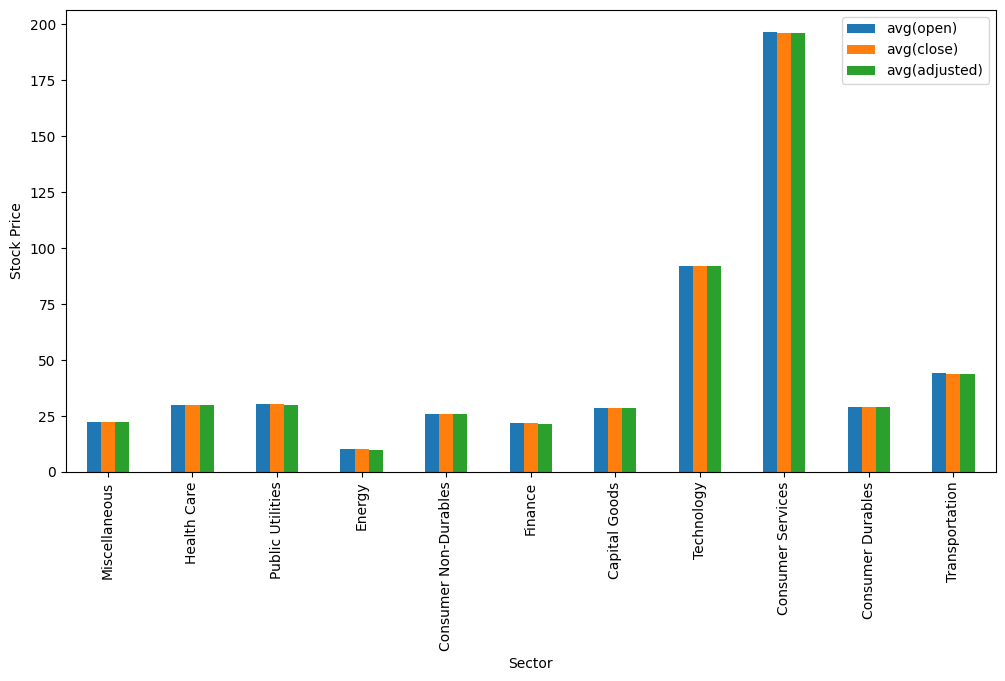

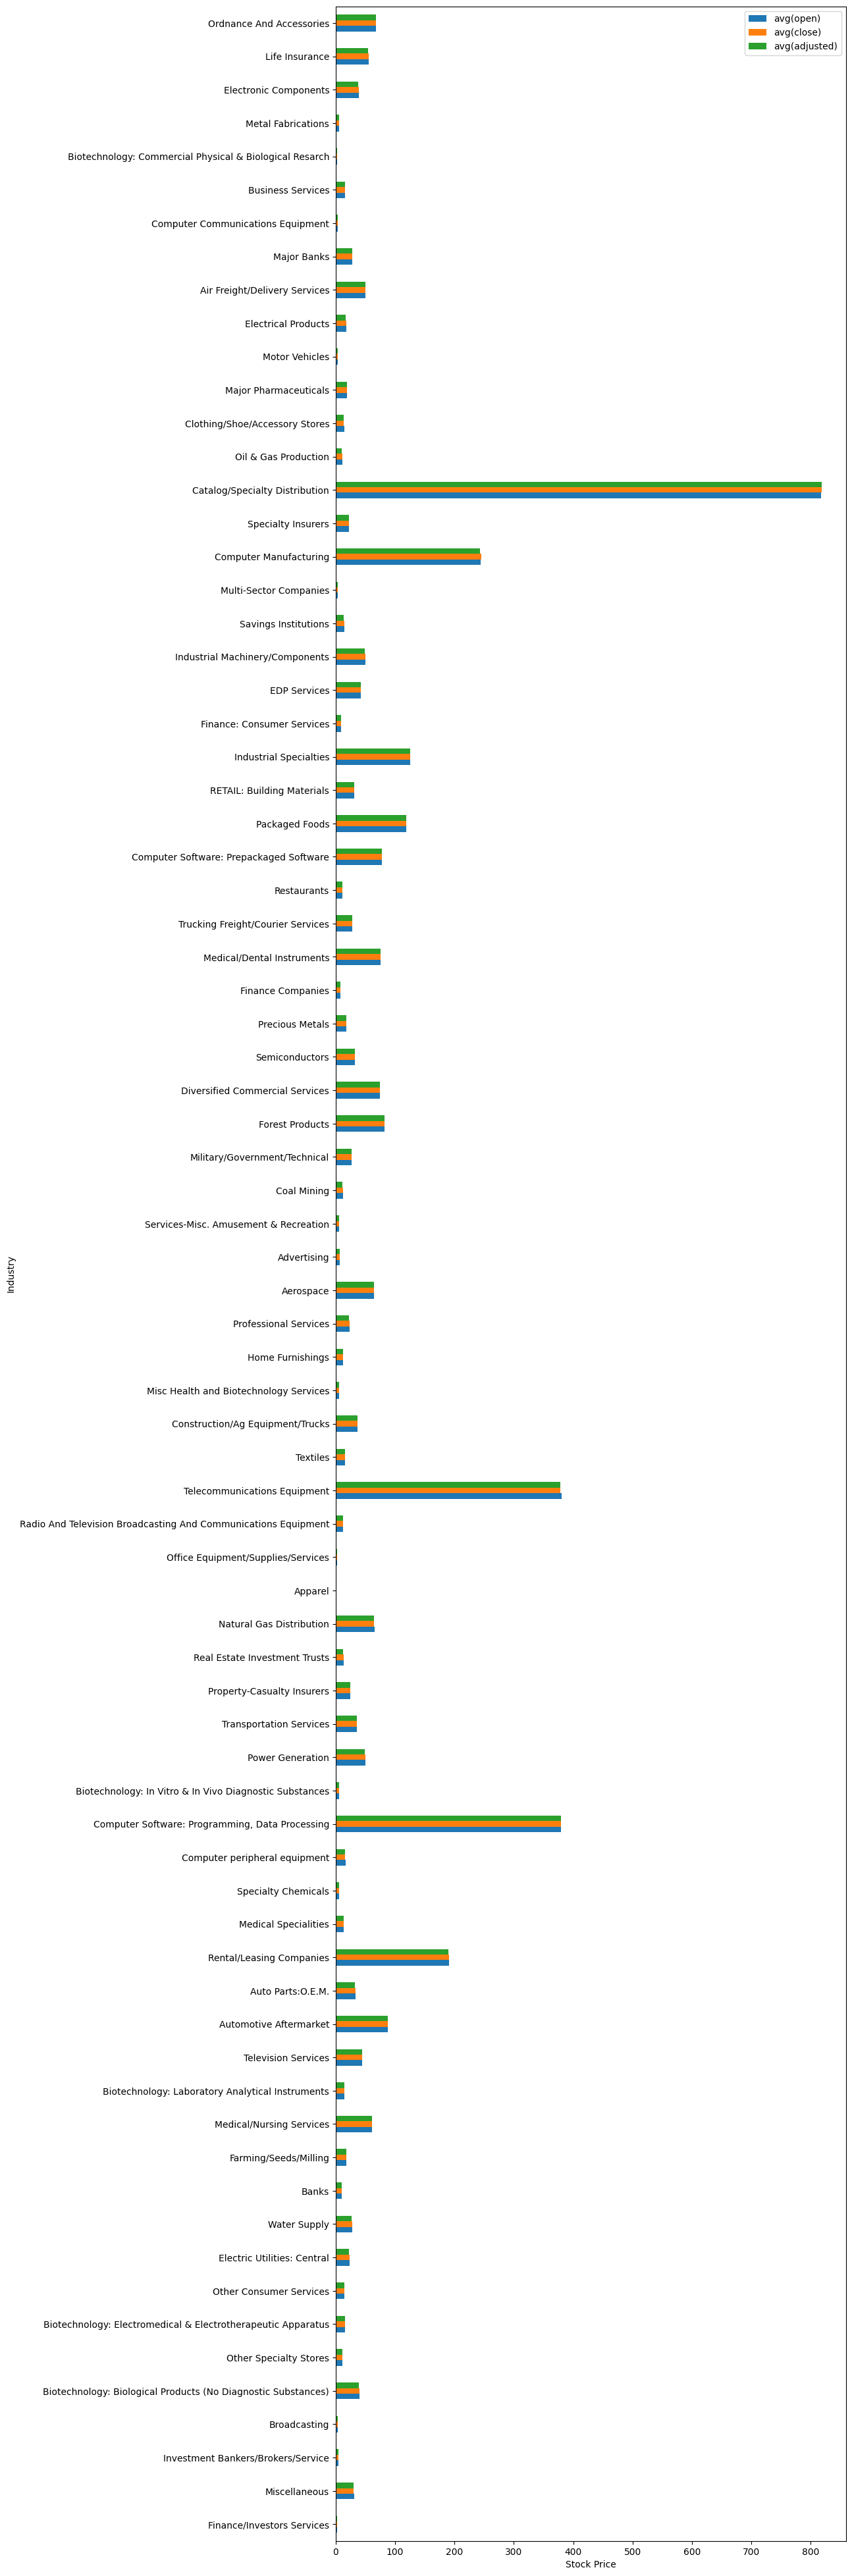

In [20]:
from matplotlib import pyplot as plt

sec_df =  data.select(['sector',
                       'open',
                       'close',
                       'adjusted']
                     )\
                     .groupBy('sector')\
                     .mean()\
                     .toPandas()

ind = list(range(12))
ind.pop(6)

sec_df.iloc[ind ,:].plot(kind='bar', x='sector', y=sec_df.columns.tolist()[1:],
                         figsize=(12, 6), ylabel='Stock Price', xlabel='Sector')
plt.show()
industries_x = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()

q  = industries_x[(industries_x.industry != 'Major Chemicals') & (industries_x.industry != 'Building Products')]
q.plot(kind='barh', x='industry', y=q.columns.tolist()[1:], figsize=(10, 50), xlabel='Stock Price', ylabel='Industry')

plt.show()


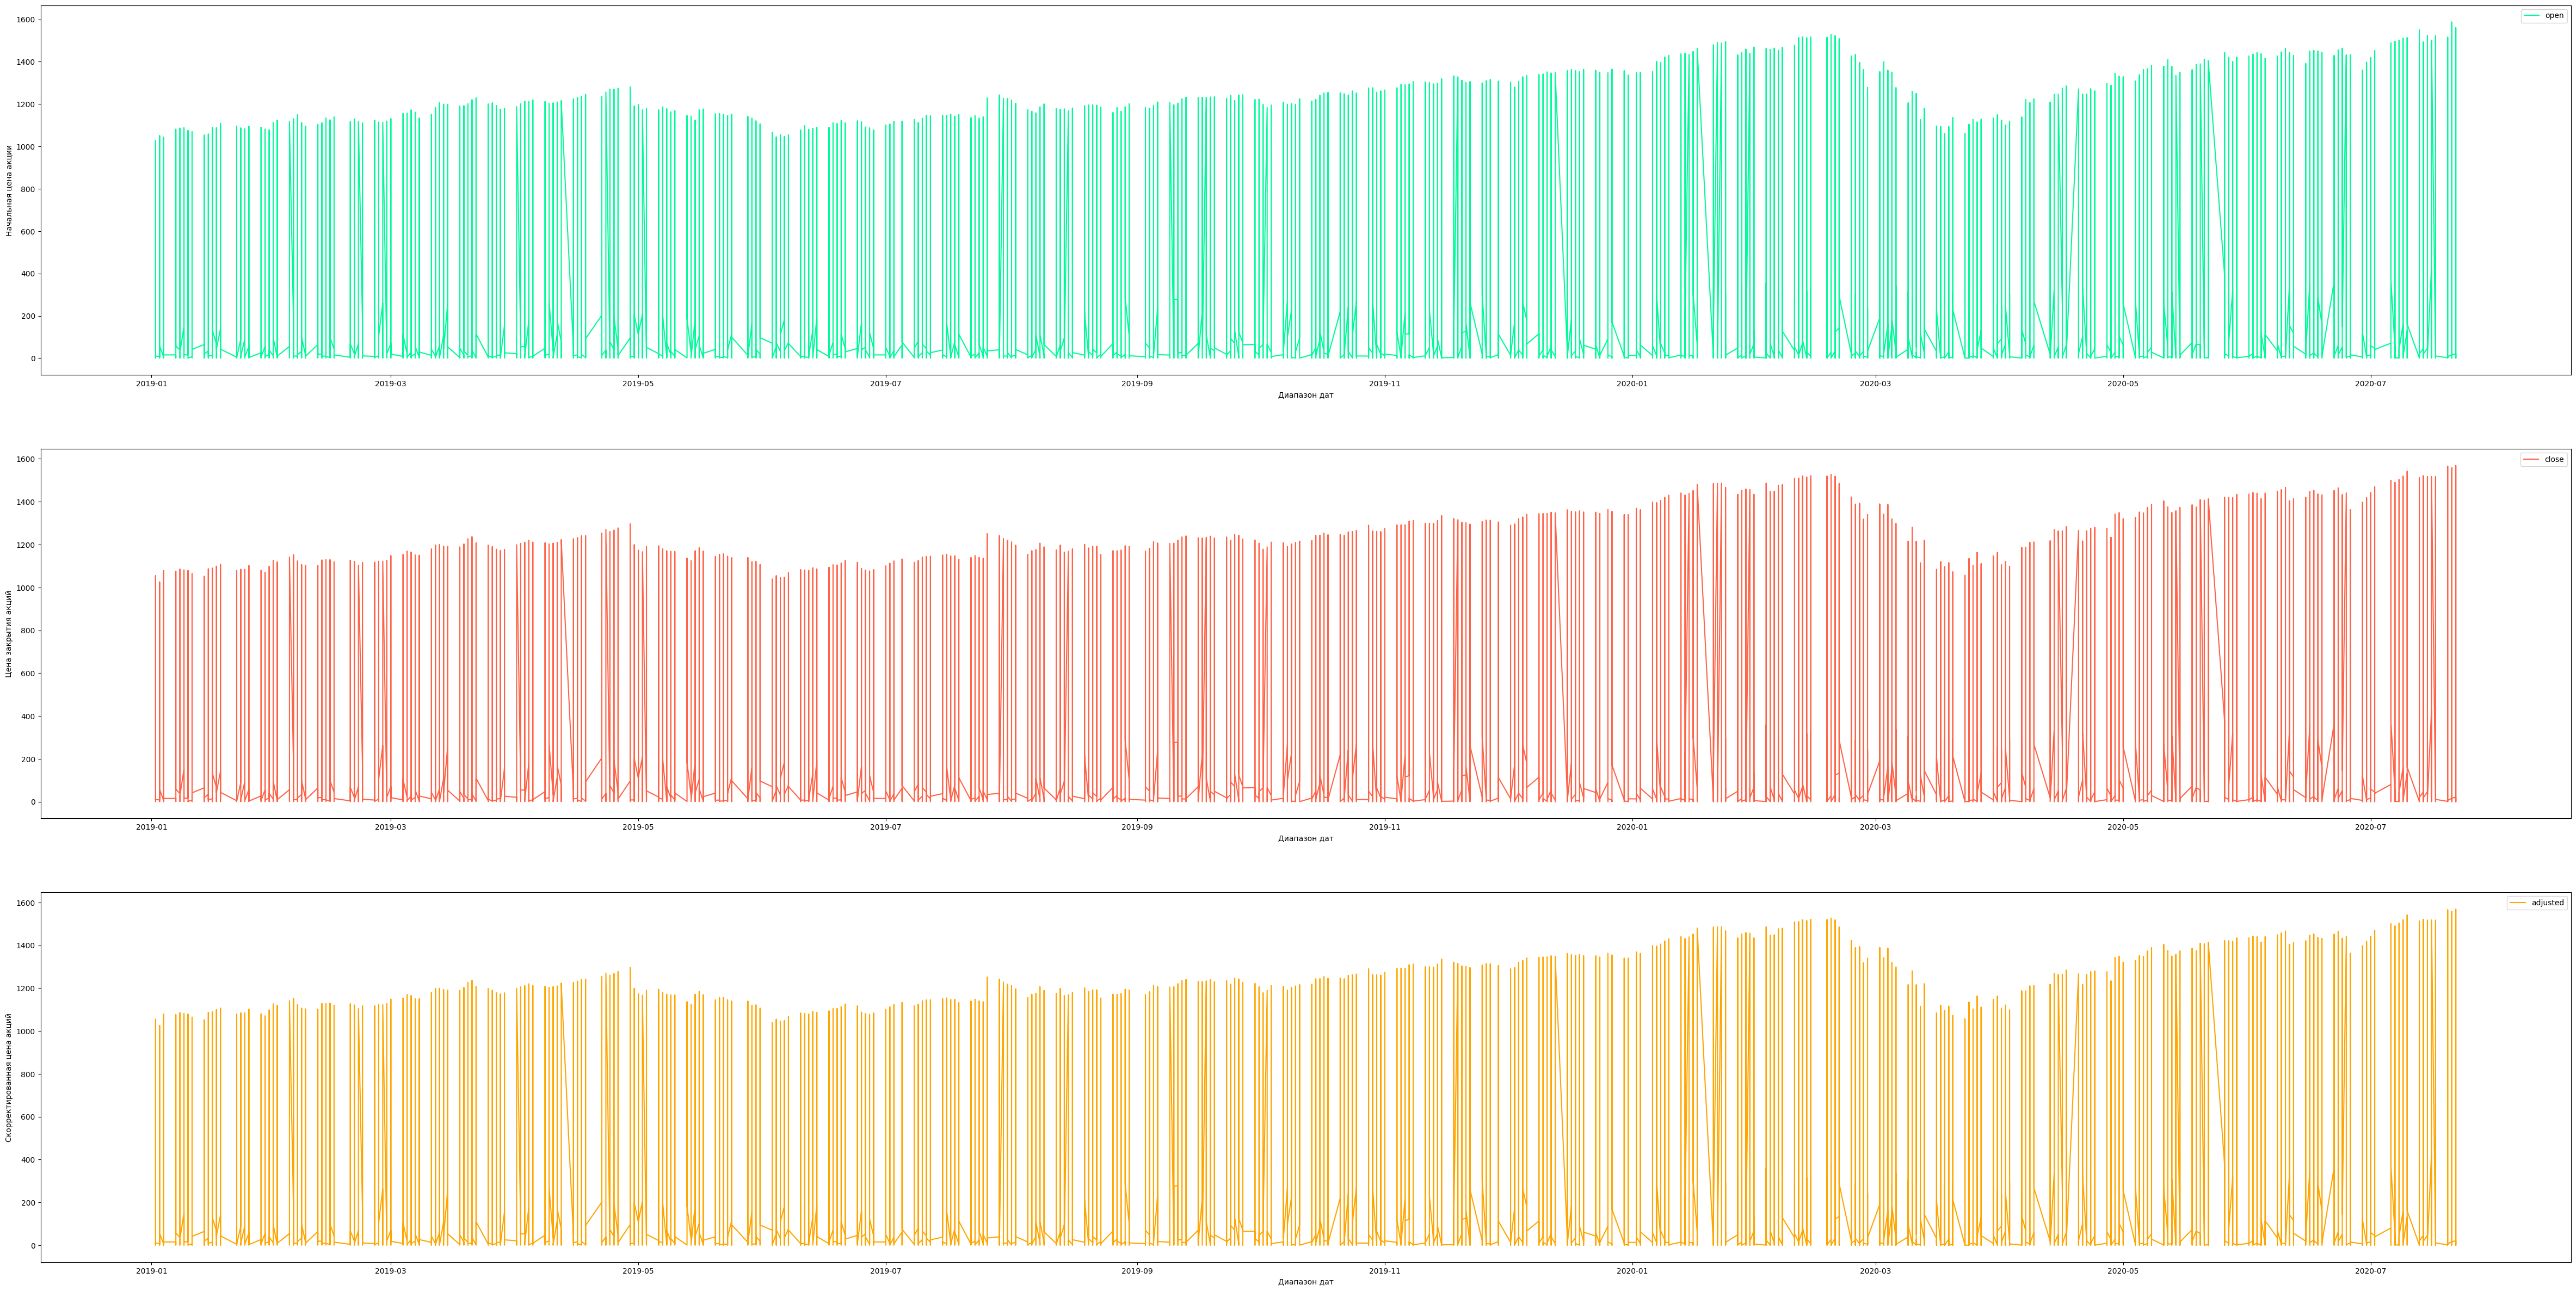

In [21]:
from pyspark.sql.functions import col

tech = data.where(col('sector') == 'Technology')\
           .select('data', 'open', 'close', 'adjusted')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize =(60, 30))
tech.toPandas().plot(kind='line', x='data', y='open',
                     xlabel='Диапазон дат', ylabel='Начальная цена акции',
                     ax=axes[0], color='mediumspringgreen')
tech.toPandas().plot(kind='line', x='data', y='close',
                     xlabel='Диапазон дат', ylabel='Цена закрытия акций',
                     ax=axes[1], color='tomato')
tech.toPandas().plot(kind='line', x='data', y='adjusted',
                     xlabel='Диапазон дат', ylabel='Скорректированная цена акций',
                     ax=axes[2], color='orange')

plt.show()

In [23]:
# JSON
data.write.save('dataset.json', format='json')

# Parquet
data.write.save('dataset.parquet', format='parquet')

# Запись выбранных данных в различные форматы файлов

# CSV
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.csv('dataset.csv')

# JSON
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.save('dataset.json', format='json')

# Parquet
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.save('dataset.parquet', format='parquet')


AnalysisException: ignored